## Random Forest


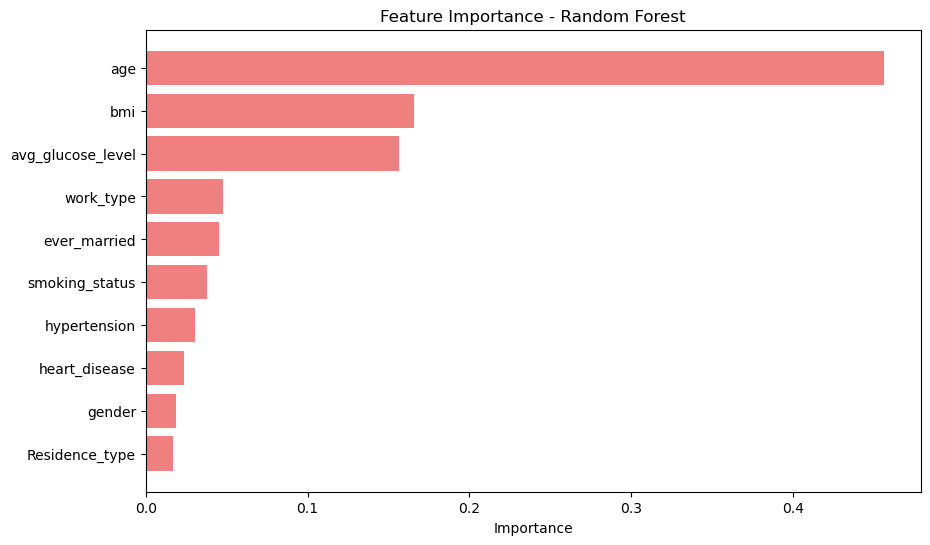

In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [2]:
# Step 1: Load the dataset
file_path = 'Resources/Stroke_dataset.csv'
df_stroke_cleaned = pd.read_csv(file_path)


In [3]:
# Step 2: Handle missing values for 'bmi' using mean imputation
imputer = SimpleImputer(strategy='mean')
df_stroke_cleaned['bmi'] = imputer.fit_transform(df_stroke_cleaned[['bmi']])


In [4]:
# Step 3: Encode categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoders = {col: LabelEncoder() for col in categorical_cols}
for col, encoder in encoders.items():
    df_stroke_cleaned[col] = encoder.fit_transform(df_stroke_cleaned[col])


In [5]:
# Step 4: Define features and target variable
X = df_stroke_cleaned.drop(columns=['id', 'stroke'])  
y = df_stroke_cleaned['stroke']


In [6]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)



In [7]:
# Step 6: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,    
    max_depth=10,        
    random_state=42,
    class_weight="balanced"  
)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [8]:
# Step 7: Evaluate the model
y_pred = rf_clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1458
           1       0.22      0.29      0.25        75

    accuracy                           0.92      1533
   macro avg       0.59      0.62      0.60      1533
weighted avg       0.93      0.92      0.92      1533



In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance from the Random Forest model
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)


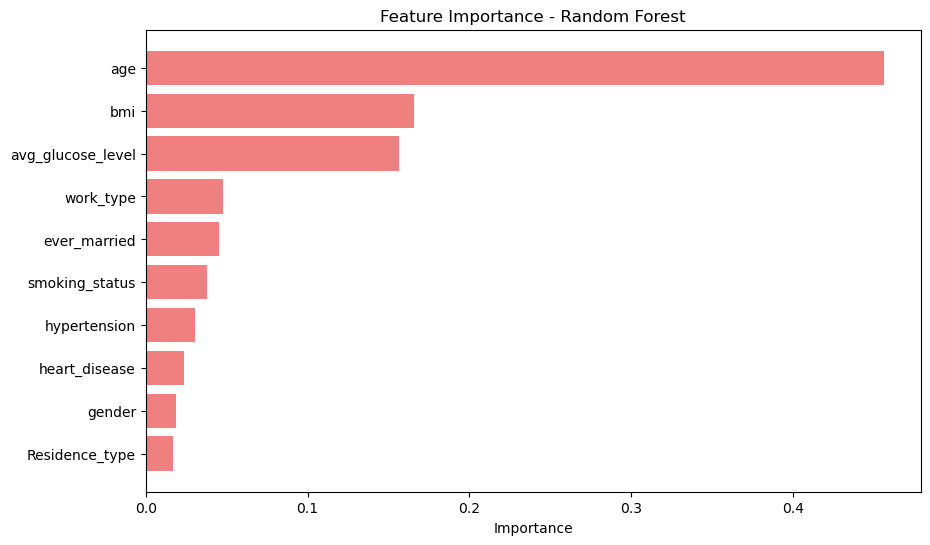

In [10]:
# Plot the feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  
plt.show()